# Implementation and Comparison of  Image Cryptography Algorithms 
by **Jai Garg (DTU/2K18/MC/044)** and **Jatin Papreja (DTU/2K18/MC/049)**

The main objective of this project involves application and comparison of various Image Cryptography algorithms. Different image cryptography algorithms use different encryption and decryption techniques resulting in varying strength of encrypted output, quality of decrypted image and total time taken. In order to study image cryptography algorithms, following approach is taken:

* **Input Image**: The image that needs to be encrypted is taken as input. The input image is resized into a 300 x 300-pixel image.

* **Image Cryptography Algorithms**: After resizing the image, cryptography algorithms are applied to encrypt the image from the sender’s end. Encrypted image is passed through decryption process of cryptographic algorithm to get decrypted image at receiver’s end. Following cryptographic algorithms are applied: 
    * Chaos Map based Image Cryptography:
        * Arnold Cat Map Encryption
        * Hénon Map Encryption
        * Logistic Map Encryption
    * Hill Cipher Encryption
    * Advanced Encryption Standard (AES)
    * Rubik’s Cube Image Encryption
    * DNA Based Image Encryption


* **Histogram Analysis**: Encrypted Image Histogram is used to analyse the strength and quality of encrypted image. Basically, the more uniform the histogram is, higher the strength of encrypted output is. Intensity Distribution Score is calculated as the mean of standard deviations of three color channels.

* **Adjacent Pixel Auto-Correlation**: It is used to analyse the performance of encryption algorithm. The correlation between some random points of encrypted image are plotted in order to visualize any observable pattern among them. A pattern in Adjacent Pixel Auto-Correlation plot generally refers to low strength and quality of encryption algorithm.

* **Key Sensitivity**: An ideal image encryption procedure should be sensitive to the secret key. It means that a little change in a secret key should produce completely different image.

* **Algorithm Running Time**: The time taken to encrypt and decrypt an image is a major deciding factor among cryptographic algorithms for use in real life applications.

* **Decrypted Image Quality**: The decrypted image is compared to the input image.

In [1]:
import os
import cv2 
import sys
import time
import random
import hashlib
import binascii
import textwrap
import numpy as np
from math import log
import tkinter as tk
from PIL import Image
from tqdm import tqdm
from random import randint
from importlib import reload
from tkinter import filedialog
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.integrate import odeint
from matplotlib.pyplot import imshow
from mpl_toolkits.mplot3d import Axes3D
from bisect import bisect_left as bsearch

plt.style.use("seaborn-darkgrid")

In [2]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0, 0]) == int:
        color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
            row.append((pix[width, height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1], color

In [3]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1]#, color

In [4]:
def galoisMult(a, b):
    p = 0
    hiBitSet = 0
    for i in range(8):
        if b & 1 == 1:
            p ^= a
        hiBitSet = a & 0x80
        a <<= 1
        if hiBitSet == 0x80:
            a ^= 0x1b
        b >>= 1
    return p % 256

# Input Image

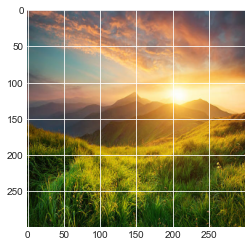

In [5]:
image = 'nature.png'
img_orig = plt.imread(image)
plt.imshow(img_orig)
plt.show()

## Histogram Analysis

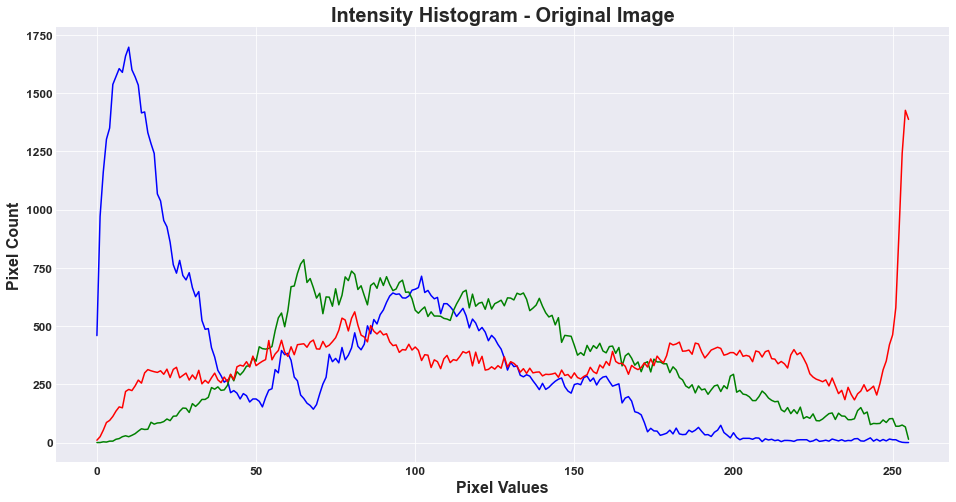

In [6]:
img = cv2.imread(image,1) 
pil_im = Image.open(image, 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [7]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 249.2488


## Adjacent Pixel Auto-Correlation

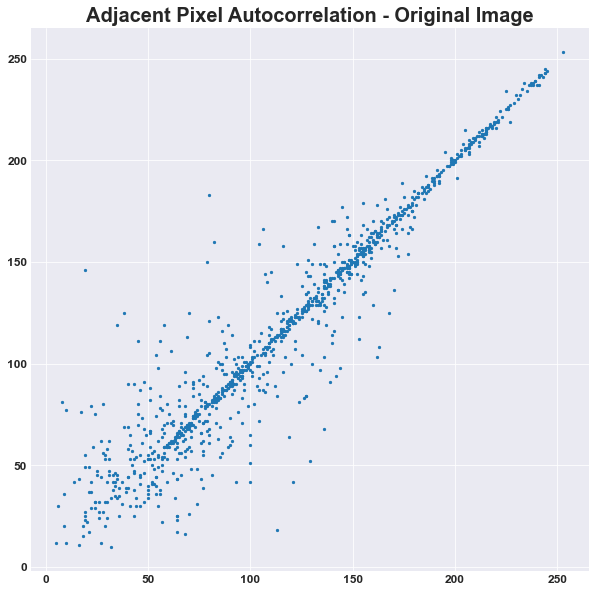

In [8]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray(image)
samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0, image_size_1-2)
    y = random.randint(0, image_size_2-1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 10))
plt.scatter(samples_x, samples_y, s=5)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20, fontweight = 'bold')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [9]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.9525


# Image Cryptography Algorithms:
## Arnold Cat Map Image Encryption

In [10]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold  

In [11]:
def ArnoldCatEncryption(imageName, key):
    img = plt.imread(imageName)
    for i in tqdm(range (0, key)):
        img = ArnoldCatTransform(img, i)
    
    plt.imsave("Arnold_Encrypt.png", img)
    return img

In [12]:
def ArnoldCatDecryption(imageName, imageOrig, key):
    img = plt.imread(imageName)
    img_1 = plt.imread(imageOrig)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
        
    for i in tqdm(range(key,decrypt_it)):
        img = ArnoldCatTransform(img, i)
        if(np.array_equal(img, img_1)):
            break
            
    plt.imsave("Arnold_Decrypt.png",img)
    return img

### Encrypted Image

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


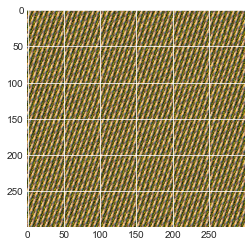

In [13]:
Encrypted = ArnoldCatEncryption(image, 20)
plt.imshow(Encrypted)
plt.show()

### Decrypted Image

 56%|█████████████████████████████████████████████▏                                  | 279/494 [00:21<00:16, 12.95it/s]


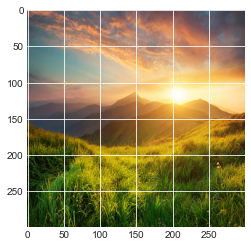

In [14]:
Decrypted = ArnoldCatDecryption("Arnold_Encrypt.png", image, 20)
plt.imshow(Decrypted)
plt.show()

### Histogram Analysis

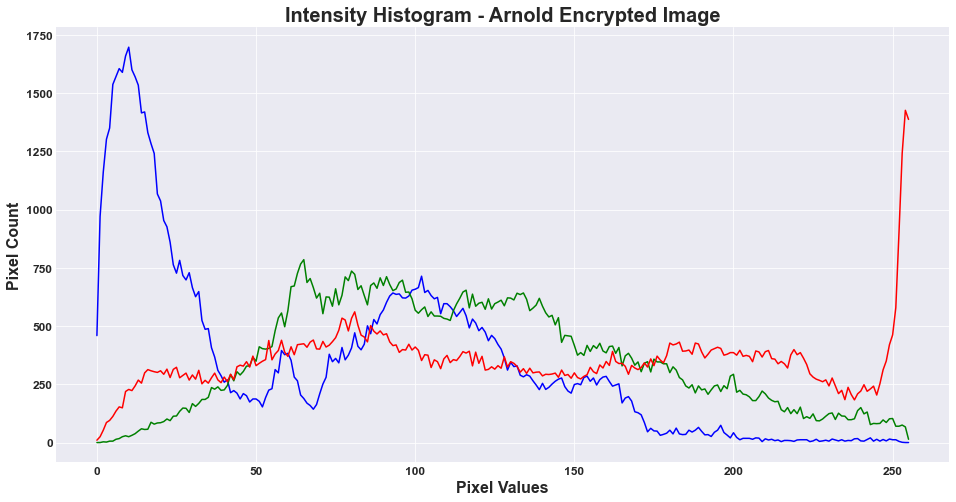

In [15]:
img = cv2.imread("Arnold_Encrypt.png",1) 
pil_im = Image.open("Arnold_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Arnold Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [16]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 249.2488


### Adjacent Pixel Auto-Correlation

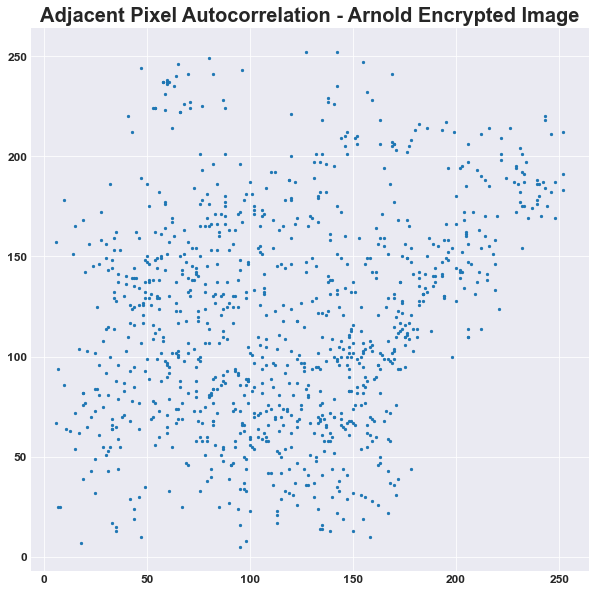

In [17]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("Arnold_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1-2)
    y = random.randint(0, image_size_2-1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 10))
plt.scatter(samples_x, samples_y, s=5)
plt.title('Adjacent Pixel Autocorrelation - Arnold Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [18]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.2222


## Henon Map Image Encryption

In [19]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [20]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    # Total Number of bitSequence produced
    sequenceSize = dimension * dimension * 8
    bitSequence = []  # Each bitSequence contains 8 bits
    # Each byteArray contains m( i.e 512 in this case) bitSequence
    byteArray = []
    # Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    TImageMatrix = []
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

In [21]:
def HenonEncryption(imageName, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimensionX, key)
    resultantMatrix = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(
                        tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^
                                 x for x in imageMatrix[i][j]])]
                else:
                    row = [transformationMatrix[i][j]
                           ^ x for x in imageMatrix[i][j]]
        try:
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        # L is for Black and white pixels
        im = Image.new("L", (dimensionX, dimensionY))

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = resultantMatrix[x][y]
    im.save("Henon_Encrypt.png", "PNG")
    return im

In [22]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimensionX, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(
                        tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^
                                 x for x in imageMatrix[i][j]])]
                else:
                    row = [transformationMatrix[i][j]
                           ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        # L is for Black and white pixels
        im = Image.new("L", (dimensionX, dimensionY))

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save("Henon_Decrypt.png", "PNG")
    return im

### Encrypted Image

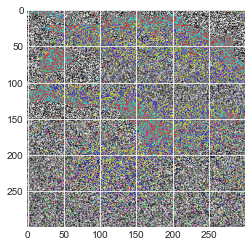

In [23]:
key = (0.1, 0.1)
HenonEncryption(image, key)
im = Image.open("Henon_Encrypt.png", 'r')
imshow(np.asarray(im))
plt.show()

### Decrypted Image

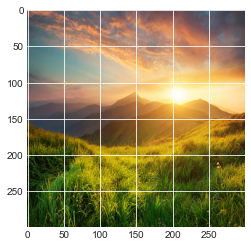

In [24]:
HenonDecryption("Henon_Encrypt.png", key)
im = Image.open("Henon_Decrypt.png", 'r')
imshow(np.asarray(im))
plt.show()

### Histogram Analysis

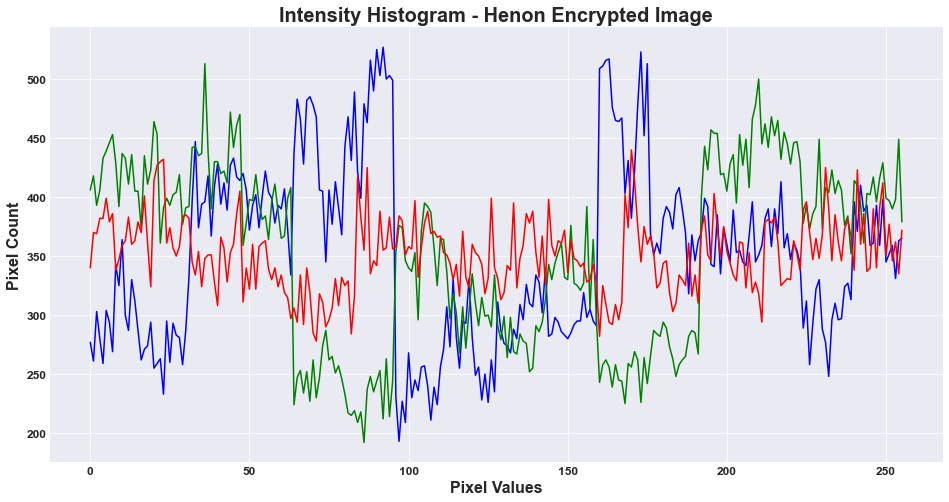

In [25]:
img = cv2.imread("Henon_Encrypt.png",1) 
pil_im = Image.open("Henon_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Henon Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [26]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 60.7352


### Adjacent Pixel Auto-Correlation

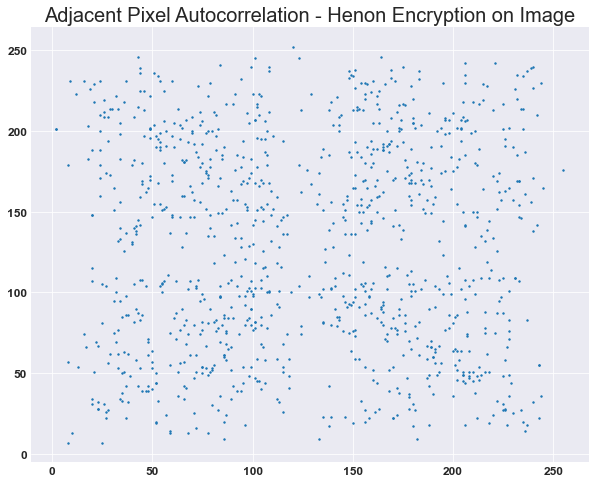

In [27]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("Henon_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title('Adjacent Pixel Autocorrelation - Henon Encryption on Image', fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [28]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0089


## Logistic Map Image Encryption

In [29]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4], key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1, 4):
        s = 0
        for j in range(1, 5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L * (10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1, 13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)

    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x < 0.8 and x > 0.2:
                x = 4*x*(1-x)
            while y < 0.8 and y > 0.2:
                y = 4*y*(1-y)
            x_round = round((x*(10**4)) % 256)
            y_round = round((y*(10**4)) % 256)
            C1 = x_round ^ ((key_list[0]+x_round) %
                            N) ^ ((C1_0 + key_list[1]) % N)
            C2 = x_round ^ ((key_list[2]+y_round) %
                            N) ^ ((C2_0 + key_list[3]) % N)
            if color:
                C_r = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
                C_g = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
                C_b = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ (
                    (key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
                row.append((C_r, C_g, C_b))
                C = C_r

            else:
                C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) %
                                              N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
                row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimensionX, dimensionY))
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        # L is for Black and white pixels
        im = Image.new("L", (dimensionX, dimensionY))

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save("Logistic_Encrypt.png", "PNG")
    return im

In [30]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1
    
    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    
    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix,dimensionX, dimensionY, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N) 
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1  
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save("Logistic_Decrypt.png", "PNG")
    return im

### Encrypted Image

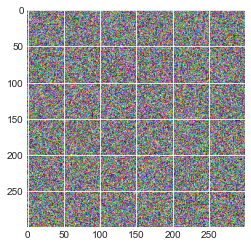

In [31]:
key = "abcdefghijklm"
im1 = LogisticEncryption(image, key)
im = Image.open("Logistic_Encrypt.png", 'r')
imshow(np.asarray(im))
plt.show()

### Decrypted Image

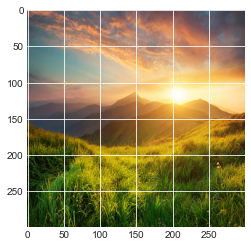

In [32]:
LogisticDecryption("Logistic_Encrypt.png", key)
im = Image.open("Logistic_Decrypt.png", 'r')
imshow(np.asarray(im))
plt.show()

### Histogram Analysis

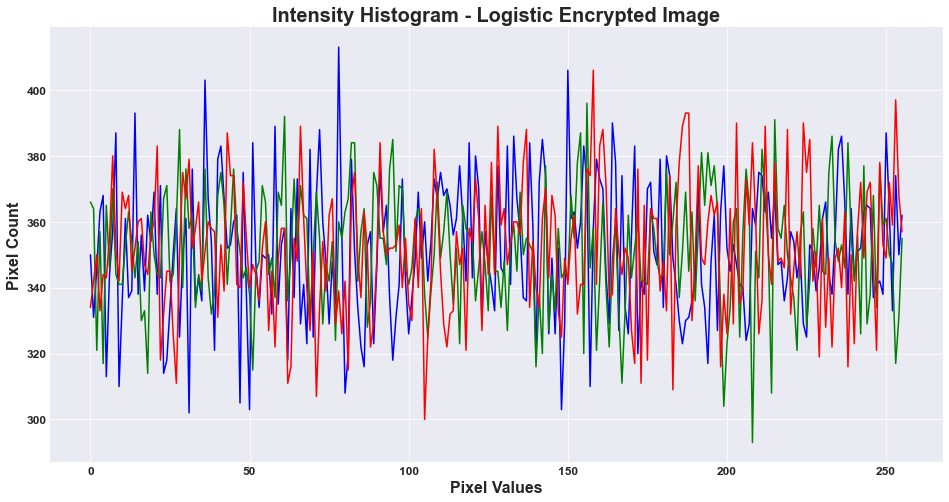

In [33]:
img = cv2.imread("Logistic_Encrypt.png",1) 
pil_im = Image.open("Logistic_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Logistic Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [34]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 19.1991


### Adjacent Pixel Auto-Correlation

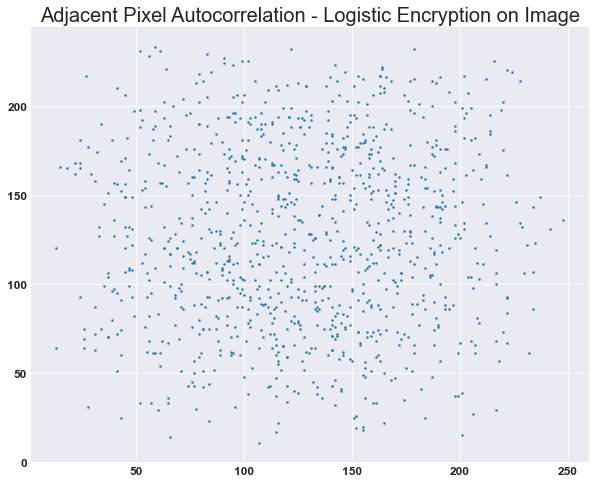

In [35]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("Logistic_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title('Adjacent Pixel Autocorrelation - Logistic Encryption on Image', fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [36]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0371


## Hill Cipher Image Encryption

In [37]:
def hill_cipher():
    src_image = np.array(Image.open('nature.png').convert("RGB"))
    width=src_image.shape[1]
    height=src_image.shape[0]

    key= np.random.randint(2, size=(height*3, height*3))

    # Encryption
    reshaped=src_image.reshape(height*3,width)
    encrypt_2d=key.dot(reshaped)
    encrypt=encrypt_2d.reshape(height,width,3)
    save_image=Image.fromarray((encrypt * 255).astype(np.uint8))
    save_image.save('Hill_Encrypt.png')
    im1 = save_image

    # Decryption
    decrypt_2d=encrypt.reshape(height*3,width)
    key_inverse=np.linalg.inv(key)
    decrypted_2d=key_inverse.dot(decrypt_2d)
    decrypted=decrypted_2d.reshape(height,width,3)
    decrypted=decrypted.astype(np.uint8)
    save_image=Image.fromarray(decrypted)
    save_image.save('Hill_Decrypt.png')
    
hill_cipher()

### Encrypted Image

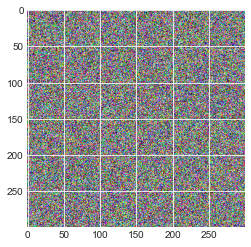

In [38]:
im1 = Image.open("Hill_Encrypt.png", 'r')
imshow(np.asarray(im1))
plt.show()

### Decrypted Image

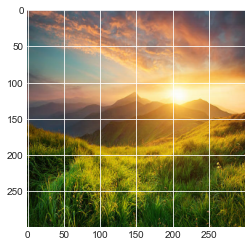

In [39]:
im2 = Image.open("Hill_Decrypt.png", 'r')
imshow(np.asarray(im2))
plt.show()

### Histogram Analysis

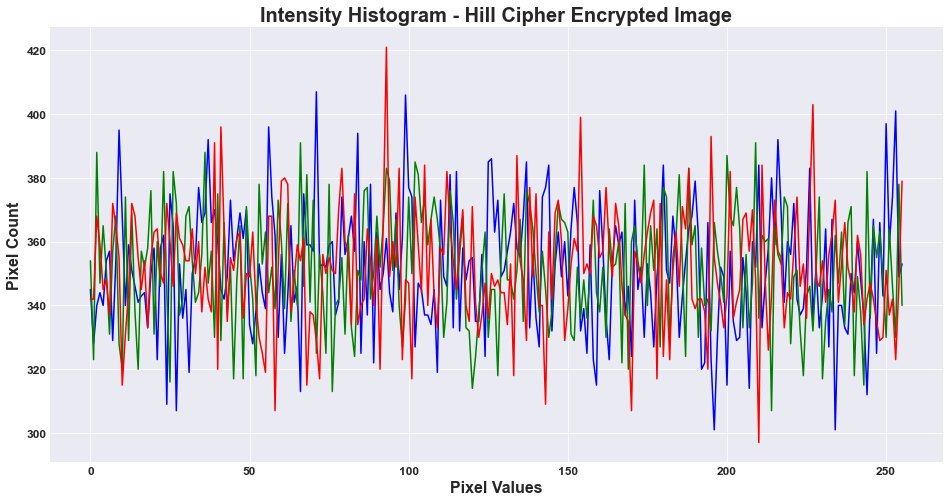

In [40]:
img = cv2.imread("Hill_Encrypt.png",1) 
pil_im = Image.open("Hill_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Hill Cipher Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [41]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 18.5452


### Adjacent Pixel Auto-Correlation

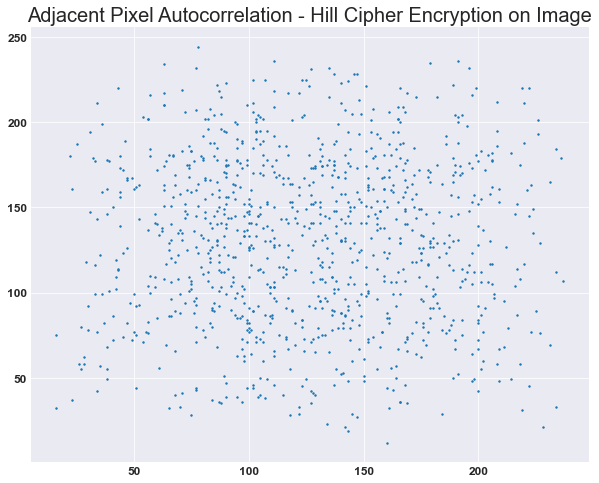

In [42]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("Hill_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title('Adjacent Pixel Autocorrelation - Hill Cipher Encryption on Image', fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [43]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0017


## Advanced Encryption Standard (AES)

In [44]:
def sub_byte_transform(img):
    sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b,
        0xfe, 0xd7, 0xab, 0x76, 0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0,
        0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0, 0xb7, 0xfd, 0x93, 0x26,
        0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2,
        0xeb, 0x27, 0xb2, 0x75, 0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0,
        0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84, 0x53, 0xd1, 0x00, 0xed,
        0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f,
        0x50, 0x3c, 0x9f, 0xa8, 0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5,
        0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2, 0xcd, 0x0c, 0x13, 0xec,
        0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14,
        0xde, 0x5e, 0x0b, 0xdb, 0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c,
        0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79, 0xe7, 0xc8, 0x37, 0x6d,
        0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f,
        0x4b, 0xbd, 0x8b, 0x8a, 0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e,
        0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e, 0xe1, 0xf8, 0x98, 0x11,
        0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f,
        0xb0, 0x54, 0xbb, 0x16
    ]

    vhex = np.vectorize(hex)
    img_hex = vhex(img)
    img_hex = img_hex[:, :, :-1]
    img_sbt = np.zeros((256, 256, 3), int)
    for i in range(256):
        for j in range(256):
            for z in range(3):
                k = int(str(img_hex[i][j][z]), 0)
                img_sbt[i][j][z] = sbox[k]
                
    return img_sbt

In [45]:
def shift_row_transform(img_sbt):
    img_srt = np.zeros((3, 256, 256), int)
    for z in range(3):
        img_sbt_1 = img_sbt[:, :, z].tolist()
        for i in range(256):
            img_srt[z][i] = img_sbt_1[i][i:] + img_sbt_1[i][0:i]

    img_srt = np.moveaxis(img_srt, 0, -1)
    return img_srt

In [46]:
def mix_col_transform(img_srt):
    img_mct = np.zeros((3, 256, 256), int)
    temp = [0] * 4
    for z in range(3):
        for i in range(0, 256, 4):
            for j in range(256):
                temp[0] = img_srt[i][j][z]
                temp[1] = img_srt[i + 1][j][z]
                temp[2] = img_srt[i + 2][j][z]
                temp[3] = img_srt[i + 3][j][z]

                img_mct[z][i][j] = galoisMult(temp[0], 2) ^ galoisMult(
                    temp[3], 1) ^ galoisMult(temp[2], 1) ^ galoisMult(temp[1], 3)
                img_mct[z][i + 1][j] = galoisMult(temp[1], 2) ^ galoisMult(
                    temp[0], 1) ^ galoisMult(temp[3], 1) ^ galoisMult(temp[2], 3)
                img_mct[z][i + 2][j] = galoisMult(temp[2], 2) ^ galoisMult(
                    temp[1], 1) ^ galoisMult(temp[0], 1) ^ galoisMult(temp[3], 3)
                img_mct[z][i + 3][j] = galoisMult(temp[3], 2) ^ galoisMult(
                    temp[2], 1) ^ galoisMult(temp[1], 1) ^ galoisMult(temp[0], 3)

    img_mct = np.moveaxis(img_mct, 0, -1)
    return img_mct

In [47]:
def add_round_key_transform(img_mct, roundKey):
    img_arkt = np.zeros((3, 256, 256), int)
    for z in range(3):
        img_arkt[z] = img_mct[:, :, z] ^ roundKey
    img_arkt = np.moveaxis(img_arkt, 0, -1)
    return img_arkt

In [48]:
def inverse_add_round_key_transform(img_arkt, roundKey):
    img_iarkt = np.zeros((3, 256, 256), int)
    for z in range(3):
        img_iarkt[z] = img_arkt[:, :, z] ^ roundKey
        
    img_iarkt = np.moveaxis(img_iarkt, 0, -1)
    return img_iarkt

In [49]:
def inv_mix_col_transform(img_iarkt):
    img_imct = np.zeros((3, 256, 256), int)
    temp = [0] * 4
    for z in range(3):
        for i in range(0, 256, 4):
            for j in range(256):
                temp[0] = img_iarkt[i][j][z]
                temp[1] = img_iarkt[i + 1][j][z]
                temp[2] = img_iarkt[i + 2][j][z]
                temp[3] = img_iarkt[i + 3][j][z]

                img_imct[z][i][j] = galoisMult(temp[0], 14) ^ galoisMult(
                    temp[3], 9) ^ galoisMult(temp[2], 13) ^ galoisMult(
                        temp[1], 11)
                img_imct[z][i + 1][j] = galoisMult(temp[1], 14) ^ galoisMult(
                    temp[0], 9) ^ galoisMult(temp[3], 13) ^ galoisMult(
                        temp[2], 11)
                img_imct[z][i + 2][j] = galoisMult(temp[2], 14) ^ galoisMult(
                    temp[1], 9) ^ galoisMult(temp[0], 13) ^ galoisMult(
                        temp[3], 11)
                img_imct[z][i + 3][j] = galoisMult(temp[3], 14) ^ galoisMult(
                    temp[2], 9) ^ galoisMult(temp[1], 13) ^ galoisMult(
                        temp[0], 11)

    img_imct = np.moveaxis(img_imct, 0, -1)
    return img_imct

In [50]:
def inv_shift_row_transform(img_imct):
    img_isrt = np.zeros((3, 256, 256), int)
    for z in range(3):
        img_imct_1 = img_imct[:, :, z].tolist()
        for i in range(256):
            img_isrt[z][i] = img_imct_1[i][-i:] + img_imct_1[i][0:-i]
            
    img_isrt = np.moveaxis(img_isrt, 0, -1)
    return img_isrt

In [51]:
def inv_sub_byte_transform(img_isrt):
    sboxInv = [
        0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e,
        0x81, 0xf3, 0xd7, 0xfb, 0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87,
        0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb, 0x54, 0x7b, 0x94, 0x32,
        0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
        0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49,
        0x6d, 0x8b, 0xd1, 0x25, 0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16,
        0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92, 0x6c, 0x70, 0x48, 0x50,
        0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
        0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05,
        0xb8, 0xb3, 0x45, 0x06, 0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02,
        0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b, 0x3a, 0x91, 0x11, 0x41,
        0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
        0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8,
        0x1c, 0x75, 0xdf, 0x6e, 0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89,
        0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b, 0xfc, 0x56, 0x3e, 0x4b,
        0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
        0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59,
        0x27, 0x80, 0xec, 0x5f, 0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d,
        0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef, 0xa0, 0xe0, 0x3b, 0x4d,
        0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63,
        0x55, 0x21, 0x0c, 0x7d
    ]

    vhex = np.vectorize(hex)
    img_isrt_hex = vhex(img_isrt)
    img_isbt = np.zeros((256, 256, 3), int)
    for i in range(256):
        for j in range(256):
            for z in range(3):
                k = int(str(img_isrt_hex[i][j][z]), 0)
                img_isbt[i][j][z] = sboxInv[k]

    return img_isbt

### Encrypted Image

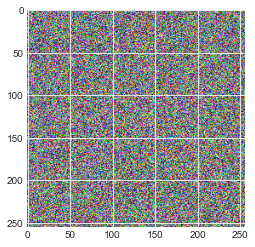

In [52]:
roundKey=np.random.randint(256,size=(256,256))
img = Image.open('nature.png')
img= img.resize((256,256))
img_sbt = sub_byte_transform(img)
img_srt = np.zeros((256, 256, 3), int)
img_srt = shift_row_transform(img_sbt)
img_mct = np.zeros((256, 256, 3), int)
img_mct = mix_col_transform(img_srt)
img_arkt = np.zeros((256, 256, 3), int)
img_arkt = add_round_key_transform(img_mct, roundKey)
save_image=Image.fromarray((img_arkt * 255).astype(np.uint8))
save_image.save('AES_Encrypt.png')
plt.imshow(img_arkt)
plt.show()

### Decrypted Image

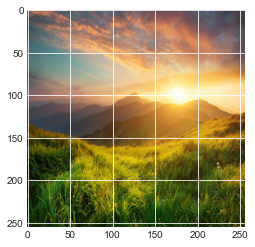

In [53]:
img_iarkt = np.zeros((256, 256, 3), int)
img_iarkt = inverse_add_round_key_transform(img_arkt, roundKey)
img_imct = np.zeros((256, 256, 3), int)
img_imct = inv_mix_col_transform(img_iarkt)
img_isrt = np.zeros((256, 256), int)
img_isrt = inv_shift_row_transform(img_imct)
img_isbt = np.zeros((256, 256, 3), int)
img_isbt = inv_sub_byte_transform(img_isrt)
save_image=Image.fromarray((img_isbt).astype(np.uint8))
save_image.save('AES_Decrypt.png')
plt.imshow(img_isbt)
plt.show()

### Histogram Analysis

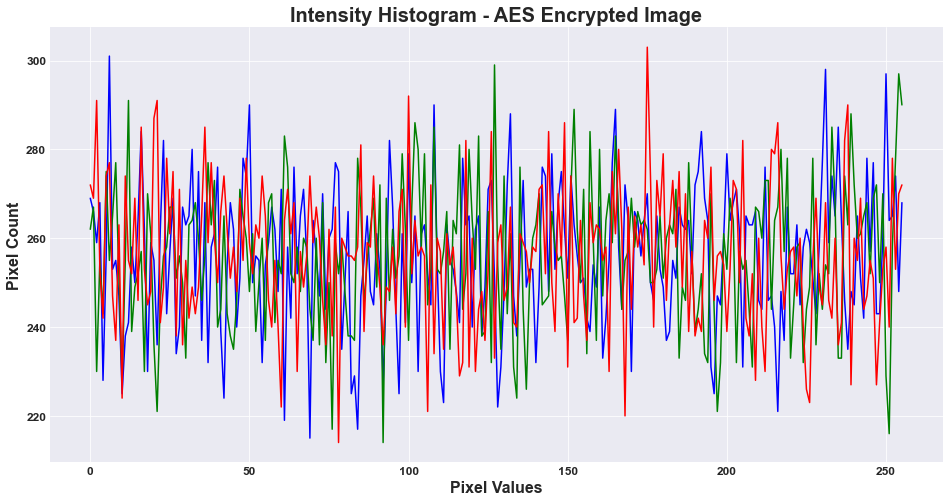

In [54]:
img = cv2.imread("AES_Encrypt.png",1) 
pil_im = Image.open("AES_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - AES Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [55]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 15.7522


### Adjacent Pixel Auto-Correlation

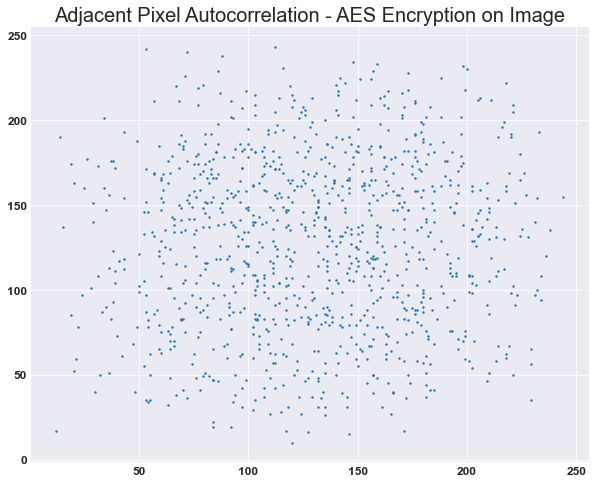

In [56]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("AES_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title('Adjacent Pixel Autocorrelation - AES Encryption on Image', fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [57]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0532


## Rubik's Cube Image Encryption Method

In [58]:
def upshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = np.roll(col,-n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def downshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = np.roll(col,n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def rotate180(n):
    bits = "{0:b}".format(n)
    return int(bits[::-1], 2)

In [59]:
def rubik_cube_encryption():
    im = Image.open('nature.png')
    pix = im.load()
    r = []
    g = []
    b = []
    for i in range(im.size[0]):
        r.append([])
        g.append([])
        b.append([])
        for j in range(im.size[1]):
            rgbPerPixel = pix[i, j]
            r[i].append(rgbPerPixel[0])
            g[i].append(rgbPerPixel[1])
            b[i].append(rgbPerPixel[2])

    m = im.size[0]
    n = im.size[1]

    # Vectors Kr and Kc
    alpha = 8
    Kr = [randint(0, pow(2, alpha)-1) for i in range(m)]
    Kc = [randint(0, pow(2, alpha)-1) for i in range(n)]
    ITER_MAX = 1

    for iterations in range(ITER_MAX):
        for i in range(m):
            rTotalSum = sum(r[i])
            gTotalSum = sum(g[i])
            bTotalSum = sum(b[i])
            rModulus = rTotalSum % 2
            gModulus = gTotalSum % 2
            bModulus = bTotalSum % 2
            if(rModulus == 0):
                r[i] = np.roll(r[i], Kr[i])
            else:
                r[i] = np.roll(r[i], -Kr[i])
            if(gModulus == 0):
                g[i] = np.roll(g[i], Kr[i])
            else:
                g[i] = np.roll(g[i], -Kr[i])
            if(bModulus == 0):
                b[i] = np.roll(b[i], Kr[i])
            else:
                b[i] = np.roll(b[i], -Kr[i])

        for i in range(n):
            rTotalSum = 0
            gTotalSum = 0
            bTotalSum = 0
            for j in range(m):
                rTotalSum += r[j][i]
                gTotalSum += g[j][i]
                bTotalSum += b[j][i]
            rModulus = rTotalSum % 2
            gModulus = gTotalSum % 2
            bModulus = bTotalSum % 2
            if(rModulus == 0):
                upshift(r, i, Kc[i])
            else:
                downshift(r, i, Kc[i])
            if(gModulus == 0):
                upshift(g, i, Kc[i])
            else:
                downshift(g, i, Kc[i])
            if(bModulus == 0):
                upshift(b, i, Kc[i])
            else:
                downshift(b, i, Kc[i])

        for i in range(m):
            for j in range(n):
                if(i % 2 == 1):
                    r[i][j] = r[i][j] ^ Kc[j]
                    g[i][j] = g[i][j] ^ Kc[j]
                    b[i][j] = b[i][j] ^ Kc[j]
                else:
                    r[i][j] = r[i][j] ^ rotate180(Kc[j])
                    g[i][j] = g[i][j] ^ rotate180(Kc[j])
                    b[i][j] = b[i][j] ^ rotate180(Kc[j])
        # For each column
        for j in range(n):
            for i in range(m):
                if(j % 2 == 0):
                    r[i][j] = r[i][j] ^ Kr[i]
                    g[i][j] = g[i][j] ^ Kr[i]
                    b[i][j] = b[i][j] ^ Kr[i]
                else:
                    r[i][j] = r[i][j] ^ rotate180(Kr[i])
                    g[i][j] = g[i][j] ^ rotate180(Kr[i])
                    b[i][j] = b[i][j] ^ rotate180(Kr[i])


    for i in range(m):
        for j in range(n):
            pix[i, j] = (r[i][j], g[i][j], b[i][j])

        im.save('Rubik_Encrypt.png')
    return im, Kr, Kc, ITER_MAX

In [60]:
def rubik_cube_decryption(Kr, Kc, ITER_MAX):
    im = Image.open('Rubik_Encrypt.png')
    pix = im.load()

    r = []
    g = []
    b = []
    for i in range(im.size[0]):
        r.append([])
        g.append([])
        b.append([])
        for j in range(im.size[1]):
            rgbPerPixel = pix[i, j]
            r[i].append(rgbPerPixel[0])
            g[i].append(rgbPerPixel[1])
            b[i].append(rgbPerPixel[2])

    m = im.size[0]
    n = im.size[1]
    
    for iterations in range(ITER_MAX):
        for j in range(n):
            for i in range(m):
                if(j % 2 == 0):
                    r[i][j] = r[i][j] ^ Kr[i]
                    g[i][j] = g[i][j] ^ Kr[i]
                    b[i][j] = b[i][j] ^ Kr[i]
                else:
                    r[i][j] = r[i][j] ^ rotate180(Kr[i])
                    g[i][j] = g[i][j] ^ rotate180(Kr[i])
                    b[i][j] = b[i][j] ^ rotate180(Kr[i])
        
        for i in range(m):
            for j in range(n):
                if(i % 2 == 1):
                    r[i][j] = r[i][j] ^ Kc[j]
                    g[i][j] = g[i][j] ^ Kc[j]
                    b[i][j] = b[i][j] ^ Kc[j]
                else:
                    r[i][j] = r[i][j] ^ rotate180(Kc[j])
                    g[i][j] = g[i][j] ^ rotate180(Kc[j])
                    b[i][j] = b[i][j] ^ rotate180(Kc[j])
        
        for i in range(n):
            rTotalSum = 0
            gTotalSum = 0
            bTotalSum = 0
            for j in range(m):
                rTotalSum += r[j][i]
                gTotalSum += g[j][i]
                bTotalSum += b[j][i]
            rModulus = rTotalSum % 2
            gModulus = gTotalSum % 2
            bModulus = bTotalSum % 2
            if(rModulus == 0):
                downshift(r, i, Kc[i])
            else:
                upshift(r, i, Kc[i])
            if(gModulus == 0):
                downshift(g, i, Kc[i])
            else:
                upshift(g, i, Kc[i])
            if(bModulus == 0):
                downshift(b, i, Kc[i])
            else:
                upshift(b, i, Kc[i])

        for i in range(m):
            rTotalSum = sum(r[i])
            gTotalSum = sum(g[i])
            bTotalSum = sum(b[i])
            rModulus = rTotalSum % 2
            gModulus = gTotalSum % 2
            bModulus = bTotalSum % 2
            if(rModulus == 0):
                r[i] = np.roll(r[i], -Kr[i])
            else:
                r[i] = np.roll(r[i], Kr[i])
            if(gModulus == 0):
                g[i] = np.roll(g[i], -Kr[i])
            else:
                g[i] = np.roll(g[i], Kr[i])
            if(bModulus == 0):
                b[i] = np.roll(b[i], -Kr[i])
            else:
                b[i] = np.roll(b[i], Kr[i])

    for i in range(m):
        for j in range(n):
            pix[i, j] = (r[i][j], g[i][j], b[i][j])
    
    im.save("Rubik_Decrypt.png")
    return im

### Encrypted Image

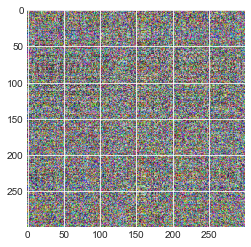

In [61]:
im1, Kr, Kc, ITER_MAX = rubik_cube_encryption()
plt.imshow(im1)
plt.show()

### Decrypted Image

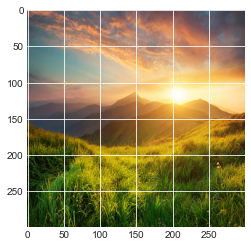

In [62]:
im2= rubik_cube_decryption(Kr, Kc, ITER_MAX)
plt.imshow(im2)
plt.show()

### Histogram Analysis

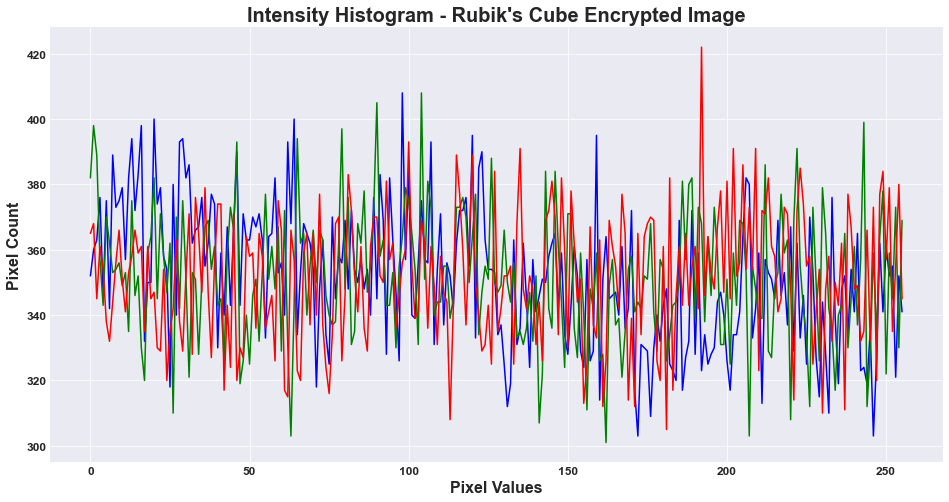

In [63]:
img = cv2.imread("Rubik_Encrypt.png",1) 
pil_im = Image.open("Rubik_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title("Intensity Histogram - Rubik's Cube Encrypted Image", fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [64]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 20.1731


### Adjacent Pixel Auto-Correlation

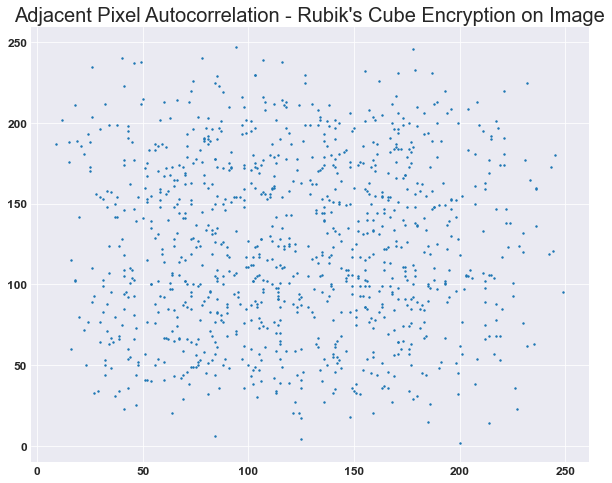

In [65]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("Rubik_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title("Adjacent Pixel Autocorrelation - Rubik's Cube Encryption on Image", fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [66]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0193


## DNA Based Image Encryption

In [67]:
# Lorenz paramters and initial conditions
a, b, c = 10, 2.667, 28
x0, y0, z0 = 0, 0, 0

# DNA-Encoding RULE #1 A = 00, T=01, G=10, C=11
dna = {}
dna["00"] = "A"
dna["01"] = "T"
dna["10"] = "G"
dna["11"] = "C"
dna["A"] = [0, 0]
dna["T"] = [0, 1]
dna["G"] = [1, 0]
dna["C"] = [1, 1]
# DNA xor
dna["AA"] = dna["TT"] = dna["GG"] = dna["CC"] = "A"
dna["AG"] = dna["GA"] = dna["TC"] = dna["CT"] = "G"
dna["AC"] = dna["CA"] = dna["GT"] = dna["TG"] = "C"
dna["AT"] = dna["TA"] = dna["CG"] = dna["GC"] = "T"
# Maximum time point and total number of time points
tmax, N = 100, 10000


def lorenz(X, t, a, b, c):
    x, y, z = X
    x_dot = -a*(x - y)
    y_dot = c*x - y - x*z
    z_dot = -b*z + x*y
    return x_dot, y_dot, z_dot


# def image_selector():  # returns path to selected image
#     path = "NULL"
#     root = tk.Tk()
#     # we don't want a full GUI, so keep the root window from appearing
#     root.withdraw()
#     # show an "Open" dialog box and return the path to the selected file
#     path = filedialog.askopenfilename()
#     if path != "NULL":
#         print("Image loaded!")
#     else:
#         print("Error Image not loaded!")
#     return path


def split_into_rgb_channels(image):
    red = image[:, :, 2]
    green = image[:, :, 1]
    blue = image[:, :, 0]
    return red, green, blue


def securekey(iname):
    img = Image.open(iname)
    m, n = img.size
    pix = img.load()
    plainimage = list() 
    for y in range(n):
        for x in range(m):
            for k in range(0, 3):
                plainimage.append(pix[x, y][k])
    key = hashlib.sha256() 
    key.update(bytearray(plainimage)) 
    return key.hexdigest(), m, n


def update_lorentz(key):
    key_bin = bin(int(key, 16))[2:].zfill(
        256)  # covert hex key digest to binary
    k = {}  # key dictionary
    key_32_parts = textwrap.wrap(key_bin, 8)  # slicing key into 8 parts
    num = 1
    for i in key_32_parts:
        k["k{0}".format(num)] = i
        num = num + 1
    t1 = t2 = t3 = 0
    for i in range(1, 12):
        t1 = t1 ^ int(k["k{0}".format(i)], 2)
    for i in range(12, 23):
        t2 = t2 ^ int(k["k{0}".format(i)], 2)
    for i in range(23, 33):
        t3 = t3 ^ int(k["k{0}".format(i)], 2)
    global x0, y0, z0
    x0 = x0 + t1/256
    y0 = y0 + t2/256
    z0 = z0 + t3/256


def decompose_matrix(iname):
    image = cv2.imread(iname)
    blue, green, red = split_into_rgb_channels(image)
    for values, channel in zip((red, green, blue), (2, 1, 0)):
        img = np.zeros((values.shape[0], values.shape[1]), dtype=np.uint8)
        img[:, :] = (values)
        if channel == 0:
            B = np.asmatrix(img)
        elif channel == 1:
            G = np.asmatrix(img)
        else:
            R = np.asmatrix(img)
    return B, G, R


def dna_encode(b, g, r):
    b = np.unpackbits(b, axis=1)
    g = np.unpackbits(g, axis=1)
    r = np.unpackbits(r, axis=1)
    m, n = b.shape
    r_enc = np.chararray((m, int(n/2)))
    g_enc = np.chararray((m, int(n/2)))
    b_enc = np.chararray((m, int(n/2)))

    for color, enc in zip((b, g, r), (b_enc, g_enc, r_enc)):
        idx = 0
        for j in range(0, m):
            for i in range(0, n, 2):
                enc[j, idx] = dna["{0}{1}".format(color[j, i], color[j, i+1])]
                idx += 1
                if (i == n-2):
                    idx = 0
                    break

    b_enc = b_enc.astype(str)
    g_enc = g_enc.astype(str)
    r_enc = r_enc.astype(str)
    return b_enc, g_enc, r_enc


def key_matrix_encode(key, b):
    b = np.unpackbits(b, axis=1)
    m, n = b.shape
    key_bin = bin(int(key, 16))[2:].zfill(256)
    Mk = np.zeros((m, n), dtype=np.uint8)
    x = 0
    for j in range(0, m):
        for i in range(0, n):
            Mk[j, i] = key_bin[x % 256]
            x += 1

    Mk_enc = np.chararray((m, int(n/2)))
    idx = 0
    for j in range(0, m):
        for i in range(0, n, 2):
            if idx == (n/2):
                idx = 0
            Mk_enc[j, idx] = dna["{0}{1}".format(Mk[j, i], Mk[j, i+1])]
            idx += 1
    Mk_enc = Mk_enc.astype(str)
    return Mk_enc


def xor_operation(b, g, r, mk):
    m, n = b.shape
    bx = np.chararray((m, n))
    gx = np.chararray((m, n))
    rx = np.chararray((m, n))
    b = b.astype(str)
    g = g.astype(str)
    r = r.astype(str)
    for i in range(0, m):
        for j in range(0, n):
            bx[i, j] = dna["{0}{1}".format(b[i, j], mk[i, j])]
            gx[i, j] = dna["{0}{1}".format(g[i, j], mk[i, j])]
            rx[i, j] = dna["{0}{1}".format(r[i, j], mk[i, j])]

    bx = bx.astype(str)
    gx = gx.astype(str)
    rx = rx.astype(str)
    return bx, gx, rx


def gen_chaos_seq(m, n):
    global x0, y0, z0, a, b, c, N
    N = m*n*4
    x = np.array((m, n*4))
    y = np.array((m, n*4))
    z = np.array((m, n*4))
    t = np.linspace(0, tmax, N)
    f = odeint(lorenz, (x0, y0, z0), t, args=(a, b, c))
    x, y, z = f.T
    x = x[:(N)]
    y = y[:(N)]
    z = z[:(N)]
    return x, y, z


def plot(x, y, z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    s = 100
    c = np.linspace(0, 1, N)
    for i in range(0, N-s, s):
        ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1],
                color=(1-c[i], c[i], 1), alpha=0.4)
    ax.set_axis_off()
    plt.show()


def sequence_indexing(x, y, z):
    n = len(x)
    fx = np.zeros((n), dtype=np.uint32)
    fy = np.zeros((n), dtype=np.uint32)
    fz = np.zeros((n), dtype=np.uint32)
    seq = sorted(x)
    for k1 in range(0, n):
        t = x[k1]
        k2 = bsearch(seq, t)
        fx[k1] = k2
    seq = sorted(y)
    for k1 in range(0, n):
        t = y[k1]
        k2 = bsearch(seq, t)
        fy[k1] = k2
    seq = sorted(z)
    for k1 in range(0, n):
        t = z[k1]
        k2 = bsearch(seq, t)
        fz[k1] = k2
    return fx, fy, fz


def scramble(fx, fy, fz, b, r, g):
    p, q = b.shape
    size = p*q
    bx = b.reshape(size).astype(str)
    gx = g.reshape(size).astype(str)
    rx = r.reshape(size).astype(str)
    bx_s = np.chararray((size))
    gx_s = np.chararray((size))
    rx_s = np.chararray((size))

    for i in range(size):
        idx = fz[i]
        bx_s[i] = bx[idx]
    for i in range(size):
        idx = fy[i]
        gx_s[i] = gx[idx]
    for i in range(size):
        idx = fx[i]
        rx_s[i] = rx[idx]
    bx_s = bx_s.astype(str)
    gx_s = gx_s.astype(str)
    rx_s = rx_s.astype(str)

    b_s = np.chararray((p, q))
    g_s = np.chararray((p, q))
    r_s = np.chararray((p, q))

    b_s = bx_s.reshape(p, q)
    g_s = gx_s.reshape(p, q)
    r_s = rx_s.reshape(p, q)
    return b_s, g_s, r_s


def scramble_new(fx, fy, fz, b, g, r):
    p, q = b.shape
    size = p*q
    bx = b.reshape(size)
    gx = g.reshape(size)
    rx = r.reshape(size)

    bx_s = b.reshape(size)
    gx_s = g.reshape(size)
    rx_s = r.reshape(size)

    bx = bx.astype(str)
    gx = gx.astype(str)
    rx = rx.astype(str)
    bx_s = bx_s.astype(str)
    gx_s = gx_s.astype(str)
    rx_s = rx_s.astype(str)

    for i in range(size):
        idx = fz[i]
        bx_s[idx] = bx[i]
    for i in range(size):
        idx = fy[i]
        gx_s[idx] = gx[i]
    for i in range(size):
        idx = fx[i]
        rx_s[idx] = rx[i]

    b_s = np.chararray((p, q))
    g_s = np.chararray((p, q))
    r_s = np.chararray((p, q))

    b_s = bx_s.reshape(p, q)
    g_s = gx_s.reshape(p, q)
    r_s = rx_s.reshape(p, q)

    return b_s, g_s, r_s


def dna_decode(b, g, r):
    m, n = b.shape
    r_dec = np.ndarray((m, int(n*2)), dtype=np.uint8)
    g_dec = np.ndarray((m, int(n*2)), dtype=np.uint8)
    b_dec = np.ndarray((m, int(n*2)), dtype=np.uint8)
    for color, dec in zip((b, g, r), (b_dec, g_dec, r_dec)):
        for j in range(0, m):
            for i in range(0, n):
                dec[j, 2*i] = dna["{0}".format(color[j, i])][0]
                dec[j, 2*i+1] = dna["{0}".format(color[j, i])][1]
    b_dec = (np.packbits(b_dec, axis=-1))
    g_dec = (np.packbits(g_dec, axis=-1))
    r_dec = (np.packbits(r_dec, axis=-1))
    return b_dec, g_dec, r_dec


def xor_operation_new(b, g, r, mk):
    m, n = b.shape
    bx = np.chararray((m, n))
    gx = np.chararray((m, n))
    rx = np.chararray((m, n))
    b = b.astype(str)
    g = g.astype(str)
    r = r.astype(str)
    for i in range(0, m):
        for j in range(0, n):
            bx[i, j] = dna["{0}{1}".format(b[i, j], mk[i, j])]
            gx[i, j] = dna["{0}{1}".format(g[i, j], mk[i, j])]
            rx[i, j] = dna["{0}{1}".format(r[i, j], mk[i, j])]

    bx = bx.astype(str)
    gx = gx.astype(str)
    rx = rx.astype(str)
    return bx, gx, rx


def recover_image(b, g, r, iname):
    img = cv2.imread(iname)
    img[:, :, 2] = r
    img[:, :, 1] = g
    img[:, :, 0] = b
    cv2.imwrite(("DNA_Encrypt.png"), img)
    return img


def decrypt(image, fx, fy, fz, fp, Mk, bt, gt, rt):
    r, g, b = split_into_rgb_channels(image)
    p, q = rt.shape
    benc, genc, renc = dna_encode(b, g, r)
    bs, gs, rs = scramble_new(fx, fy, fz, benc, genc, renc)
    bx, rx, gx = xor_operation_new(bs, gs, rs, Mk)
    blue, green, red = dna_decode(bx, gx, rx)
    green, red = red, green
    img = np.zeros((p, q, 3), dtype=np.uint8)
    img[:, :, 0] = red
    img[:, :, 1] = green
    img[:, :, 2] = blue
    cv2.imwrite(("DNA_Decrypt.png"), img)


def dna_image_encryption():
    file_path = "nature.png"
    key, m, n = securekey(file_path)
    update_lorentz(key)
    blue, green, red = decompose_matrix(file_path)
    blue_e, green_e, red_e = dna_encode(blue, green, red)
    Mk_e = key_matrix_encode(key, blue)
    blue_final, green_final, red_final = xor_operation(blue_e, green_e, red_e, Mk_e)
    x, y, z = gen_chaos_seq(m, n)
    fx, fy, fz = sequence_indexing(x, y, z)
    blue_scrambled, green_scrambled, red_scrambled = scramble(fx, fy, fz, blue_final, red_final, green_final)
    b, g, r = dna_decode(blue_scrambled, green_scrambled, red_scrambled)
    img = recover_image(b, g, r, file_path)
    decrypt(img, fx, fy, fz, file_path, Mk_e, blue, green, red)
    
dna_image_encryption()

### Encrypted Image

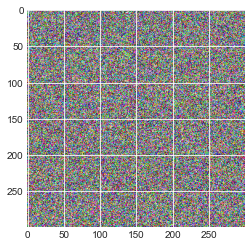

In [68]:
im1 = Image.open("DNA_Encrypt.png", 'r')
imshow(np.asarray(im1))
plt.show()

### Decrypted Image

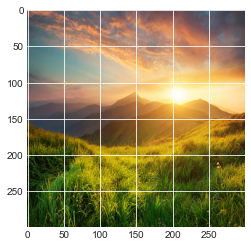

In [69]:
im2 = Image.open("DNA_Decrypt.png", 'r')
imshow(np.asarray(im2))
plt.show()

### Histogram Analysis

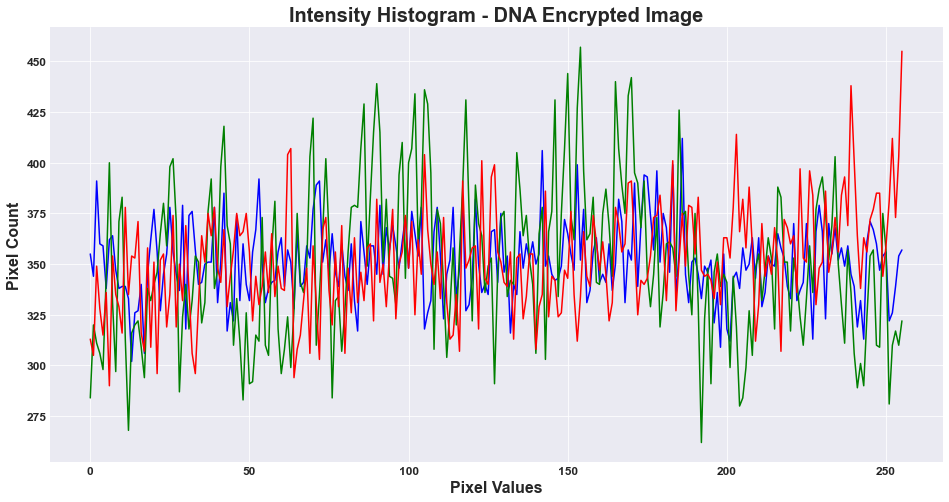

In [70]:
img = cv2.imread("DNA_Encrypt.png", 1) 
pil_im = Image.open("DNA_Encrypt.png", 'r')
plt.figure(figsize=(16,8))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - DNA Encrypted Image', fontsize=20, fontweight = 'bold')
plt.xlabel('Pixel Values', fontsize=16, fontweight = 'bold')
plt.ylabel('Pixel Count', fontsize=16, fontweight = 'bold') 
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [71]:
ids = (histogram_blue.std() + histogram_red.std() + histogram_green.std())/3
print("Intensity Distribution Score: {:.4f}".format(ids))

Intensity Distribution Score: 27.7349


### Adjacent Pixel Auto-Correlation

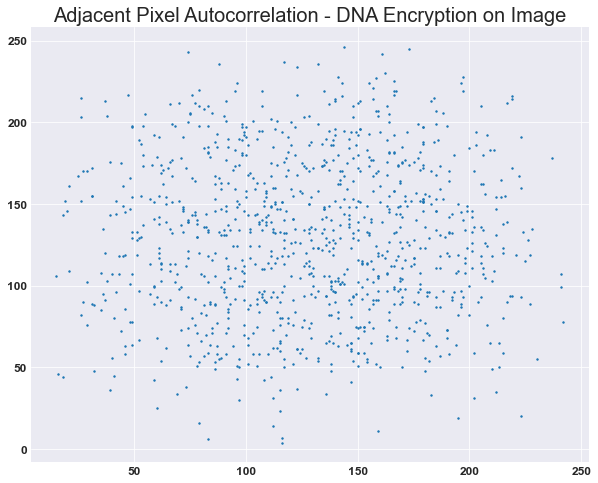

In [72]:
ImageMatrix, image_size_1, image_size_2 = getImageMatrix_gray("DNA_Encrypt.png")
samples_x = []
samples_y = []
# print(image_size)
for i in range(1024):
    x = random.randint(0, image_size_1 - 2)
    y = random.randint(0, image_size_2 - 1)
    samples_x.append(ImageMatrix[x][y][0])
    samples_y.append(ImageMatrix[x+1][y][0])
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, s=2)
plt.title('Adjacent Pixel Autocorrelation - DNA Encryption on Image', fontsize=20)
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

In [73]:
corr, _ = pearsonr(samples_x, samples_y)
print("Pearson's Correlation Coefficient: {:.4f}".format(corr))

Pearson's Correlation Coefficient: 0.0188
